In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data Collection and Processing

In [ ]:
'''
  loading the data from csv_file to pandas DataFrame '''
car_dataset = pd.read_csv("/content/car data.csv")

In [ ]:
#Inspecting  Top 5 Rows of the DataFrame
car_dataset.head()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


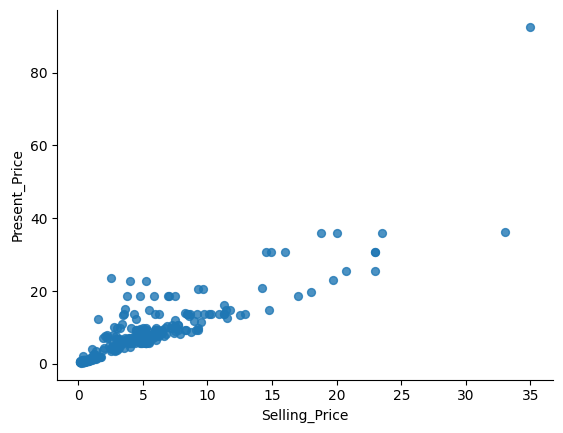

In [ ]:
# @title Selling_Price vs Present_Price

from matplotlib import pyplot as plt
car_dataset.plot(kind='scatter', x='Selling_Price', y='Present_Price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# prompt: shape of the dataset

car_dataset.shape


(301, 9)

In [ ]:
# prompt: getting some info about the dataset

# @title Getting some info about the dataset
car_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
# prompt: check the number of missing values

car_dataset.isnull().sum()


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

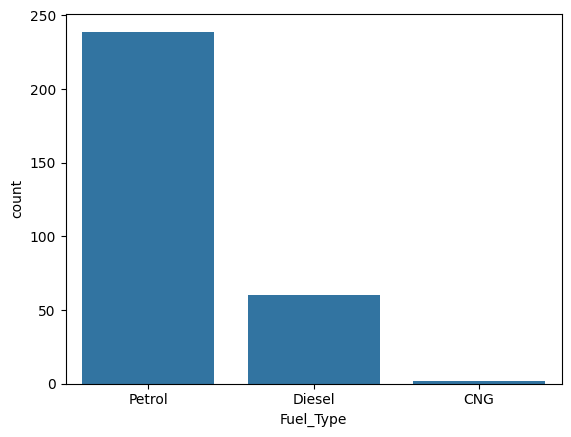

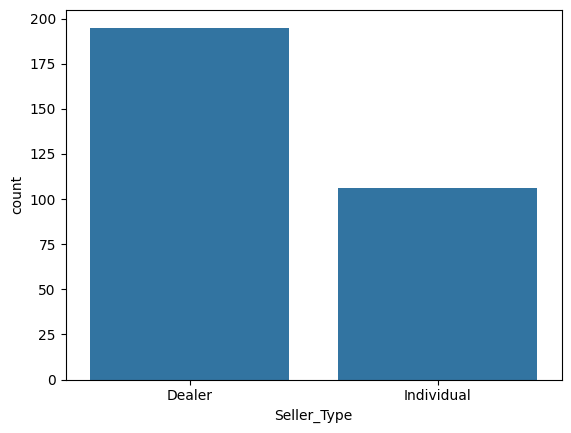

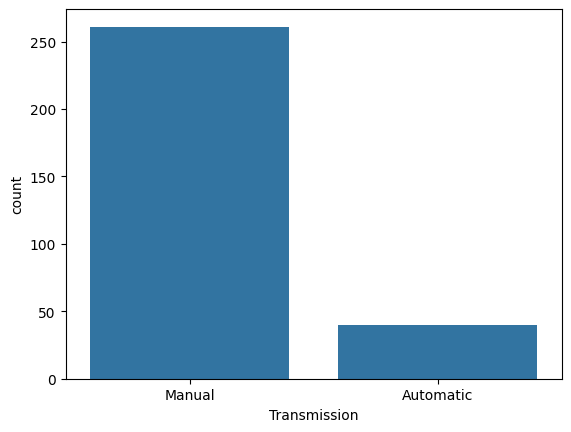

In [ ]:
# prompt: checking the distribution of categorical data

import matplotlib.pyplot as plt
sns.countplot(x='Fuel_Type', data=car_dataset)
plt.show()

sns.countplot(x='Seller_Type', data=car_dataset)
plt.show()

sns.countplot(x='Transmission', data=car_dataset)
plt.show()


In [ ]:
car_dataset.replace({'fuel_type':{'petrol':0,'Disel':1,'CNG':2}},inplace=True)

car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

car_dataset.replace({'Transmission':{'Manual':0,'Automic':1}},inplace=True)

In [ ]:
car_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,Car_Name_Bajaj Avenger 150 street,...,Car_Name_swift,Car_Name_sx4,Car_Name_verna,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
1,2013,4.75,9.54,43000,0,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,True
2,2017,7.25,9.85,6900,0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
3,2011,2.85,4.15,5200,0,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,True
4,2014,4.60,6.87,42450,0,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,True


Traning Data and Test Data

In [ ]:
# prompt: Training data and test data  and split the data

X = car_dataset.drop(['Selling_Price'],axis=1)
Y = car_dataset['Selling_Price']



In [ ]:
print(X)

     Year  Present_Price  Kms_Driven  Owner  Car_Name_Activa 3g  \
0    2014           5.59       27000      0               False   
1    2013           9.54       43000      0               False   
2    2017           9.85        6900      0               False   
3    2011           4.15        5200      0               False   
4    2014           6.87       42450      0               False   
..    ...            ...         ...    ...                 ...   
296  2016          11.60       33988      0               False   
297  2015           5.90       60000      0               False   
298  2009          11.00       87934      0               False   
299  2017          12.50        9000      0               False   
300  2016           5.90        5464      0               False   

     Car_Name_Activa 4g  Car_Name_Bajaj  ct 100  Car_Name_Bajaj Avenger 150  \
0                 False                   False                       False   
1                 False              

In [ ]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [ ]:
# splitting Training and Test data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)


1. LINEAR REGRESSION

In [ ]:
lin_reg_model = LinearRegression()

In [ ]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Model Evalution

In [ ]:
#Prediction on training data
training_data_prediction = lin_reg_model.predict(X_train)

In [ ]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error:", error_score)

R squared Error: 0.9424989331947506


VISUALIZING THE ACTUAL PRICE VS ORIGNAL PRICE PREDICTION

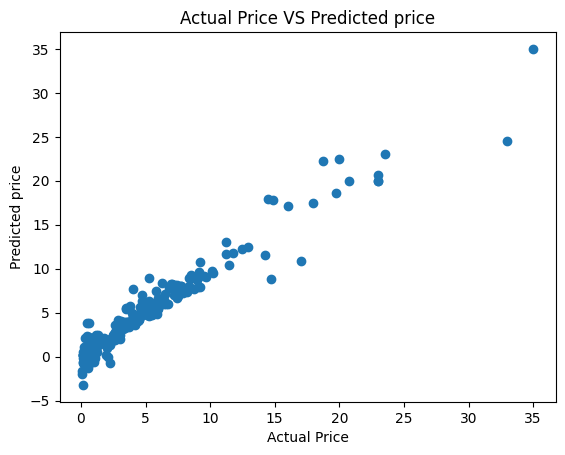

In [ ]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted price")
plt.title("Actual Price VS Predicted price")
plt.show()

In [ ]:
#Prediction on test data
test_data_prediction = lin_reg_model.predict(X_test)

In [ ]:
 #R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error:", error_score)

R squared Error: 0.1727633110989356


<function matplotlib.pyplot.show(close=None, block=None)>

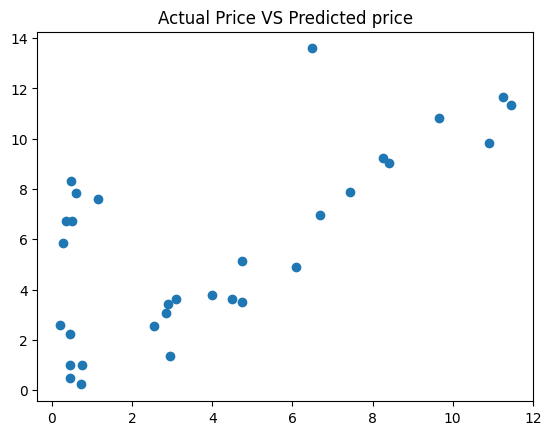

In [ ]:
plt.scatter(Y_test,test_data_prediction)
plt.title("Actual Price VS Predicted price")
plt.show

Lesso Regression

In [ ]:
less_reg_model = Lasso()

In [ ]:
less_reg_model.fit(X_train,Y_train)

Lasso()

Model Evalution

In [ ]:
training_data_prediction = less_reg_model.predict(X_train)

In [ ]:
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error :", error_score)

R squared Error : 0.8427856123435794


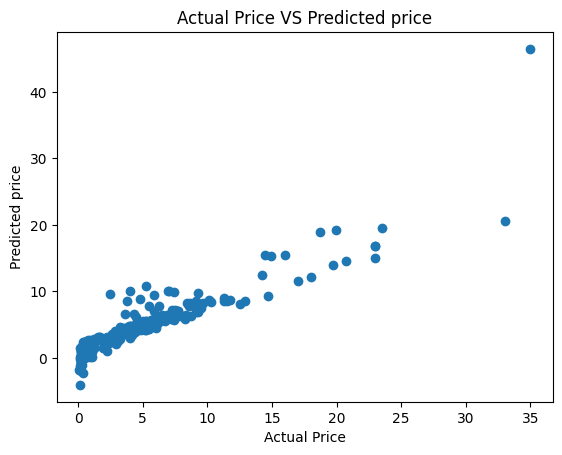

In [ ]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted price")
plt.title("Actual Price VS Predicted price")
plt.show()

In [ ]:
#Prediction on test data
test_data_prediction = less_reg_model.predict(X_test)

In [ ]:
 #R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error:", error_score)

R squared Error: 0.8709167941173195


<function matplotlib.pyplot.show(close=None, block=None)>

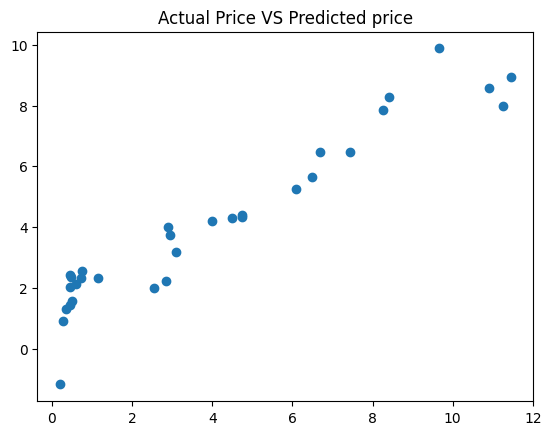

In [ ]:
plt.scatter(Y_test,test_data_prediction)
plt.title("Actual Price VS Predicted price")
plt.show